In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.metrics import normalized_mutual_info_score as NMI
import copy
import random

In [2]:
from vnds import VNDS

# DATASET FOOTBALL

/var/folders/vk/mzqnq6ms35s1hsltjx9l00_c0000gn/T/ipykernel_25952/3055878614.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix1 = nx.adjacency_matrix(G1)


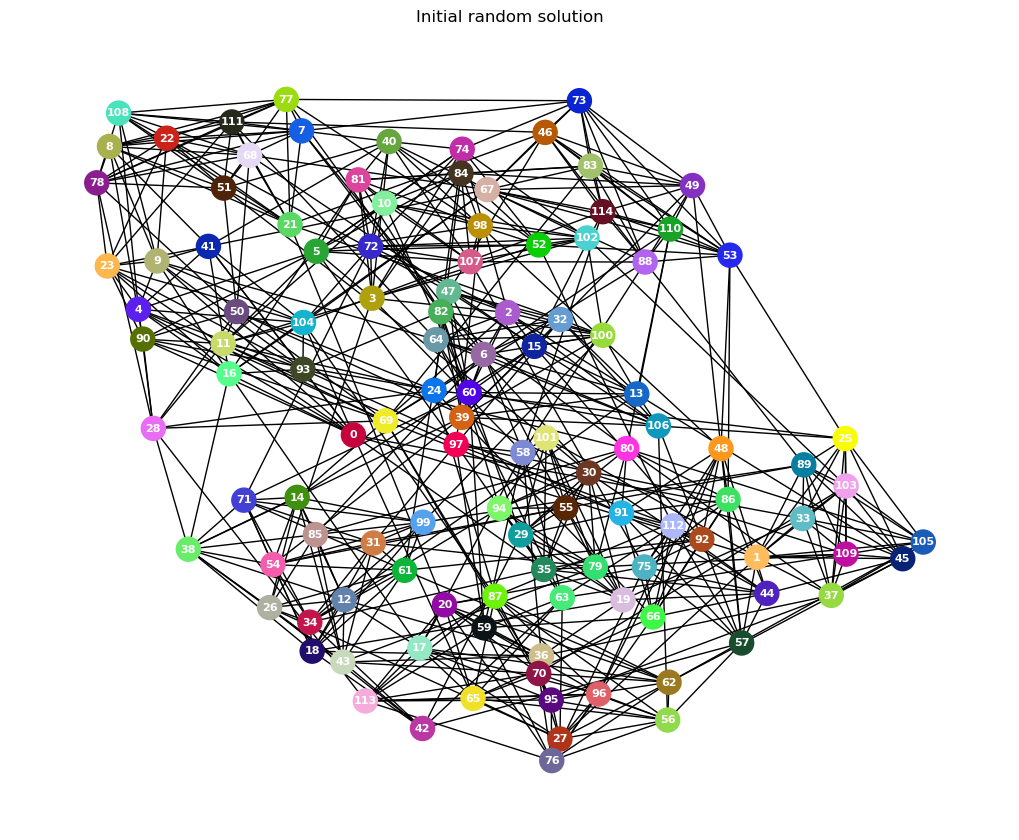

starting Execution
Execution finished 


In [3]:
# Read the GML file and create a graph object
file_path_football = "./Datasets/football/football.gml"
G1 = nx.read_gml(file_path_football, label=None)
# Get the adjacency matrix
adj_matrix1 = nx.adjacency_matrix(G1)

# Convert the adjacency matrix to a numpy array
adj_matrix1 = adj_matrix1.toarray()

NUMBER_VERTICES_1 = adj_matrix1.shape[0]
adj_matrix1 = pd.DataFrame(adj_matrix1, index = range(NUMBER_VERTICES_1), columns = range(NUMBER_VERTICES_1))

vnds1 = VNDS()
g1 = vnds1.VNDS_main(adj_matrix1, stoping_condition=5)

In [4]:
# print the modularity of the resulting graph 
print("Modularity of the graph :", g1.Q())

Modularity of the graph : 0.6045695626834571


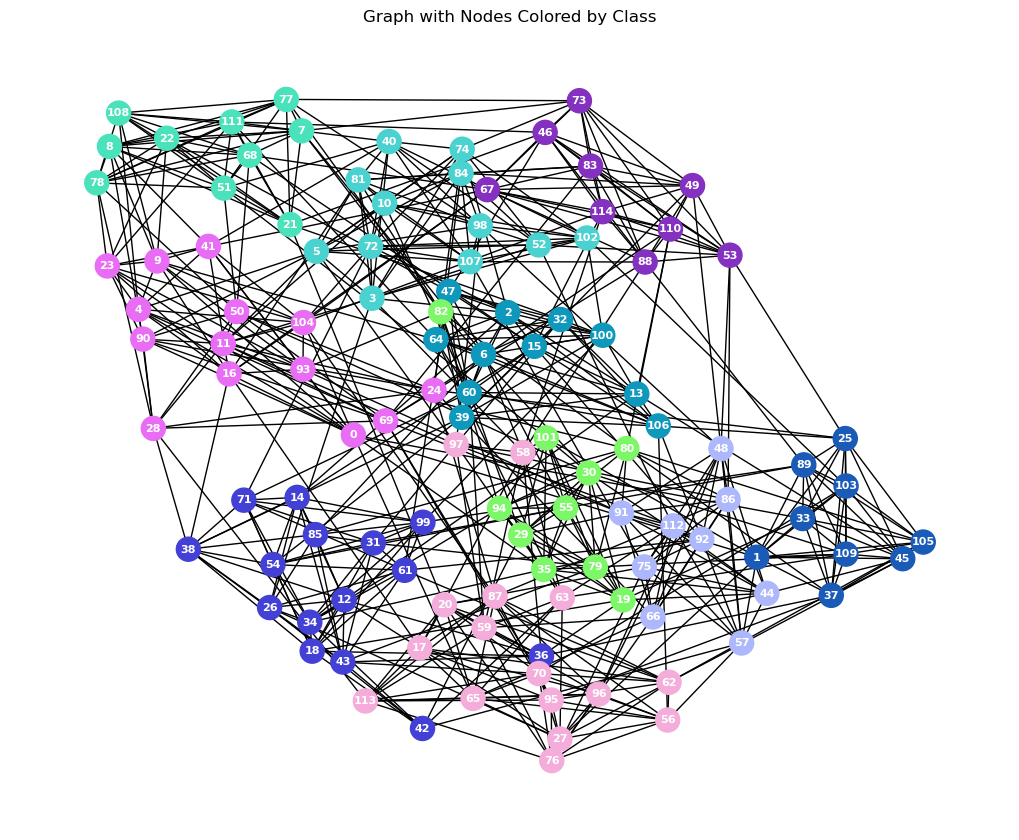

In [5]:
# draw the resulting graph 
g1.draw()

In [6]:
# Print the number of comunities detected by VNDS
print(f"Nombre de communités detectées par l'heuristique VNDS  est : {len(g1.used_labels)}")

Nombre de communités detectées par l'heuristique VNDS  est : 10


In [7]:
# Comparaison with ground truth
groundTruth1 = np.array([
  7, 0, 2, 3, 7, 3, 2, 8, 8, 7, 3, 10, 6, 2, 6, 2, 7, 9, 6, 1, 9, 8, 8, 7, 10, 0, 6, 9, 11,
  1, 1, 6, 2, 0, 6, 1, 5, 0, 6, 2, 3, 7, 5, 6, 4, 0, 11, 2, 4, 11, 10, 8, 3, 11, 6, 1, 9, 4,
  11, 10, 2, 6, 9, 10, 2, 9, 4, 11, 8, 10, 9, 6, 3, 11, 3, 4, 9, 8, 8, 1, 5, 3, 5, 11, 3, 6,
  4, 9, 11, 0, 5, 4, 4, 7, 1, 9, 9, 10, 3, 6, 2, 1, 3, 0, 7, 0, 2, 3, 8, 0, 4, 8, 4, 9, 11
])


assert len(groundTruth1) == len(g1.V)

PredictedLabels1 = []
for node in g1.V:
  PredictedLabels1.append(g1.G.nodes[node]['color'])

pd.crosstab(PredictedLabels1, groundTruth1)

col_0    0   1   2   3   4   5   6   7   8   9   10  11
row_0                                                  
#0e98bc   0   0  11   0   0   0   0   0   0   0   0   0
#1a5bb8   9   0   0   0   0   0   0   0   0   0   0   0
#4341d5   0   0   0   0   0   2  13   0   0   0   0   0
#49d2cf   0   0   0  12   0   0   0   0   0   0   0   0
#4ae2ba   0   0   0   0   0   0   0   0  10   0   0   0
#7cf767   0   8   0   0   0   2   0   0   0   0   0   0
#8431c1   0   0   0   0   1   0   0   0   0   0   0   8
#adb8fc   0   0   0   0   9   0   0   0   0   0   0   0
#e96df4   0   0   0   0   0   1   0   8   0   0   4   1
#f4acda   0   0   0   0   0   0   0   0   0  12   3   1

In [8]:
# Calculating the NMI 
nmi_score1 = NMI(groundTruth1,PredictedLabels1)
print("Normalized Mutual Information:", nmi_score1)

Normalized Mutual Information: 0.8903166312052428


# DATASET KARATE

/var/folders/vk/mzqnq6ms35s1hsltjx9l00_c0000gn/T/ipykernel_25952/57562633.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix2 = nx.adjacency_matrix(G2)


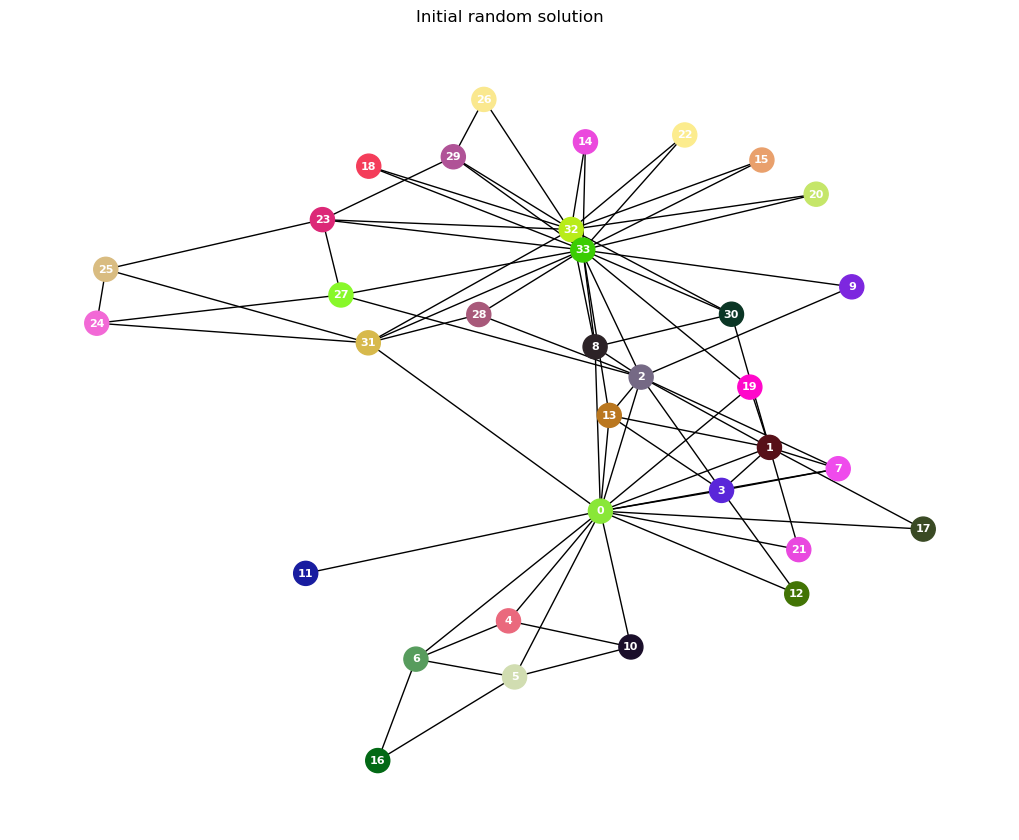

starting Execution
Execution finished 


In [9]:
# Read the GML file and create a graph object
file_path_karate = './Datasets/karate//karate.gml'
G2 = nx.read_gml(file_path_karate, label=None)
# Get the adjacency matrix
adj_matrix2 = nx.adjacency_matrix(G2)

# Convert the adjacency matrix to a numpy array
adj_matrix2 = adj_matrix2.toarray()

NUMBER_VERTICES_2 = adj_matrix2.shape[0]
adj_matrix2 = pd.DataFrame(adj_matrix2, index = range(NUMBER_VERTICES_2), columns = range(NUMBER_VERTICES_2))

vnds2 = VNDS()
g2 = vnds2.VNDS_main(adj_matrix2, stoping_condition=5)

In [10]:
# print the modularity of the resulting graph 
print("Modularity of the graph :", g2.Q())

Modularity of the graph : 0.41978961209730437


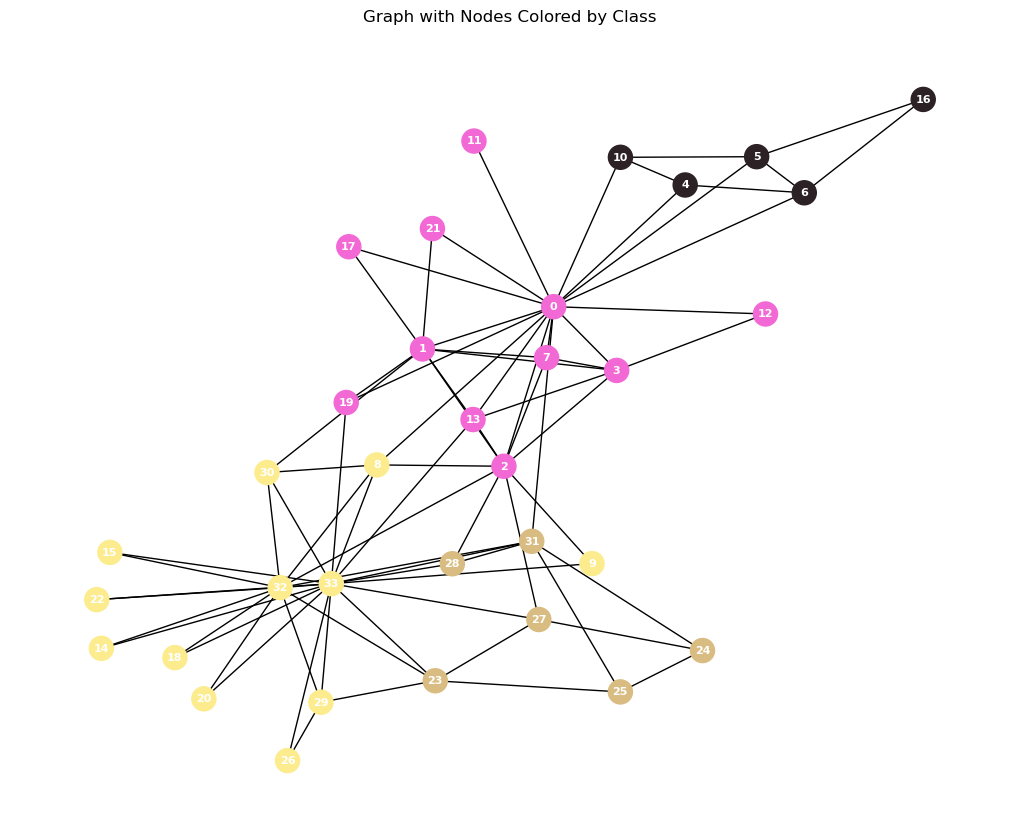

In [11]:
# draw the resulting graph 
g2.draw()

In [12]:
# print the number of communities detected by VNDS
print(f"Nombre de communités detectées par l'heuristique VNDS  est : {len(g2.used_labels)}")

Nombre de communités detectées par l'heuristique VNDS  est : 4


In [13]:
# Comparaison with ground truth
groundTruth2 = np.array([0, 0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1])

assert len(groundTruth2) == len(g2.V)

PredictedLabels2 = []
for node in g2.V:
  PredictedLabels2.append(g2.G.nodes[node]['color'])

pd.crosstab(PredictedLabels2, groundTruth2)

col_0     0   1
row_0          
#2c2226   5   0
#d9bc81   0   6
#f269d6  11   0
#fcec8e   0  12

In [14]:
# Calculating the NMI 
nmi_score2 = NMI(groundTruth2,PredictedLabels2)
print("Normalized Mutual Information:", nmi_score2)

Normalized Mutual Information: 0.6872628843326487


# DATASET POLBOOKS

/var/folders/vk/mzqnq6ms35s1hsltjx9l00_c0000gn/T/ipykernel_25952/3810355239.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix3 = nx.adjacency_matrix(G3)


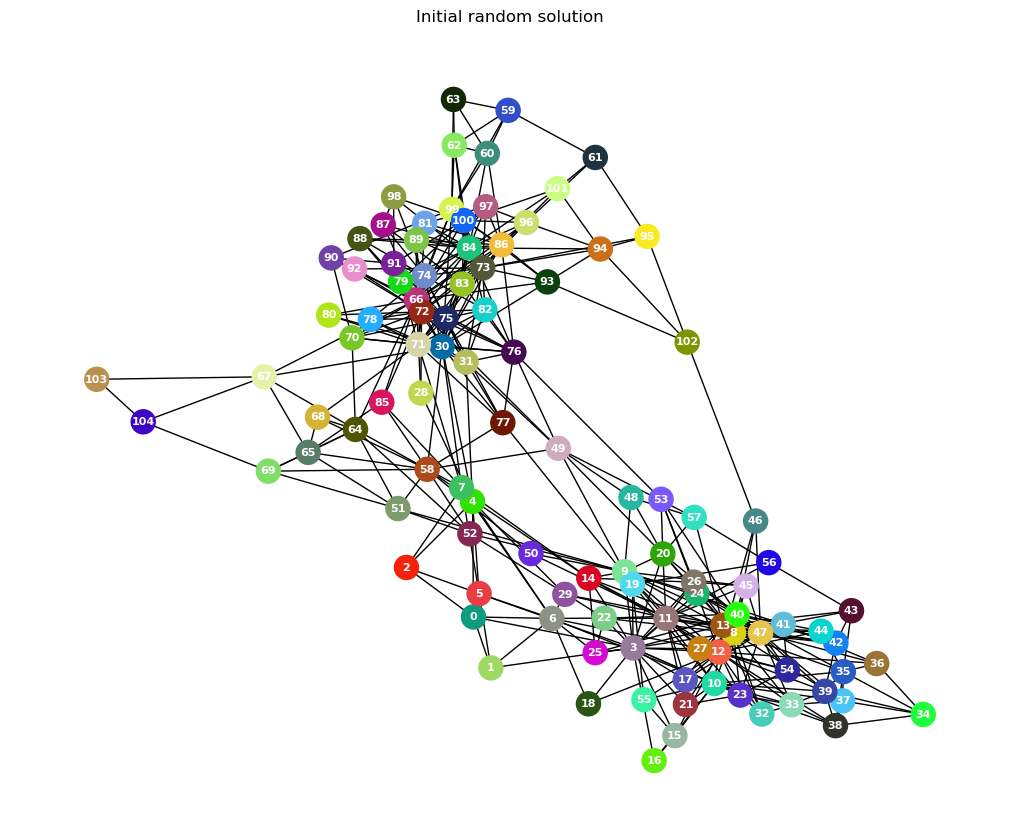

starting Execution
Execution finished 


In [15]:
# Read the GML file and create a graph object
file_path_Polbooks = "./Datasets/polbooks/polbooks.gml"
G3 = nx.read_gml(file_path_Polbooks, label=None)
# Get the adjacency matrix
adj_matrix3 = nx.adjacency_matrix(G3)

# Convert the adjacency matrix to a numpy array
adj_matrix3 = adj_matrix3.toarray()

NUMBER_VERTICES_3 = adj_matrix3.shape[0]
adj_matrix3 = pd.DataFrame(adj_matrix3, index = range(NUMBER_VERTICES_3), columns = range(NUMBER_VERTICES_3))

vnds3 = VNDS()
g3 = vnds3.VNDS_main(adj_matrix3, stoping_condition=5)

In [16]:
# print the modularity of the resulting graph 
print("Modularity of the graph :", g3.Q())

Modularity of the graph : 0.5272365938060788


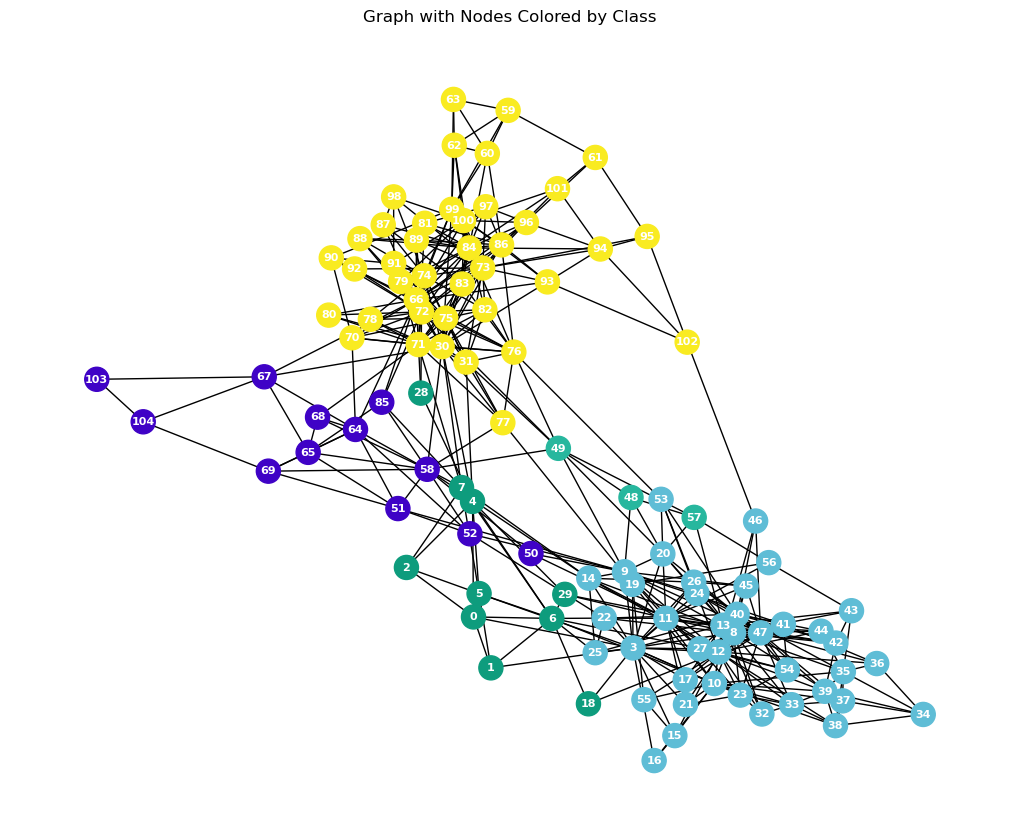

In [17]:
# draw the resulting graph 
g3.draw()

In [18]:
# print the number of communities detected by VNDS
print(f"Nombre de communités detectées par l'heuristique VNDS  est : {len(g3.used_labels)}")

Nombre de communités detectées par l'heuristique VNDS  est : 5


In [19]:
# Comparaison with ground truth
groundTruth3 = np.array([0,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0])
assert len(groundTruth3) == len(g3.V)

PredictedLabels3 = []
for node in g3.V:
  PredictedLabels3.append(g3.G.nodes[node]['color'])

pd.crosstab(PredictedLabels3, groundTruth3)

col_0    0   1   2
row_0             
#0e9c7d  6   4   0
#27b79e  1   2   0
#3f02c6  4   3   5
#5fbdd6  1  39   0
#f9eb21  1   1  38

In [20]:
# Calculating the NMI
nmi_score3 = NMI(groundTruth3,PredictedLabels3)
print("Normalized Mutual Information:", nmi_score3)

Normalized Mutual Information: 0.5602630985644045


# DATASET DOLPHINS

/var/folders/vk/mzqnq6ms35s1hsltjx9l00_c0000gn/T/ipykernel_25952/1053171039.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix4 = nx.adjacency_matrix(G4)


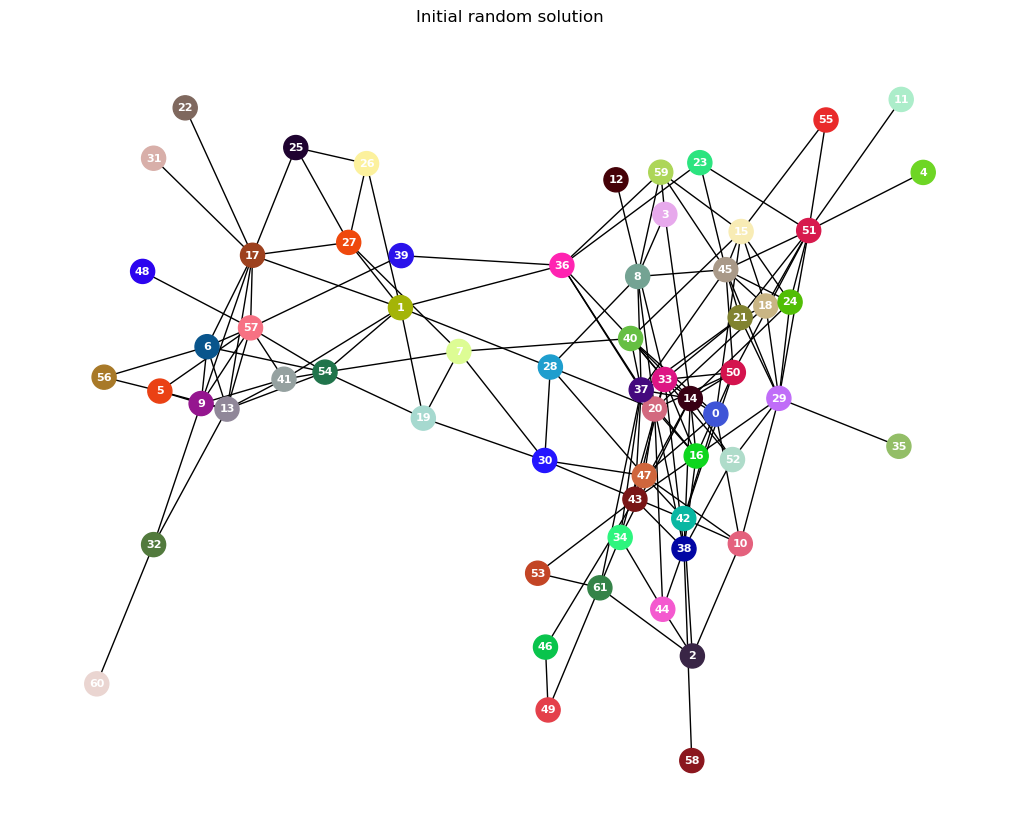

starting Execution
Execution finished 


In [21]:
# Read the GML file and create a graph object
file_path_dolphins = "./Datasets/dolphins/dolphins.gml"
G4 = nx.read_gml(file_path_dolphins, label=None)
# Get the adjacency matrix
adj_matrix4 = nx.adjacency_matrix(G4)

# Convert the adjacency matrix to a numpy array
adj_matrix4 = adj_matrix4.toarray()

NUMBER_VERTICES_4 = adj_matrix4.shape[0]
adj_matrix4 = pd.DataFrame(adj_matrix4, index = range(NUMBER_VERTICES_4), columns = range(NUMBER_VERTICES_4))

vnds4 = VNDS()
g4 = vnds4.VNDS_main(adj_matrix4, stoping_condition=5)

In [22]:
# print the modularity of the resulting graph 
print("Modularity of the graph :", g4.Q())

Modularity of the graph : 0.5201139195443218


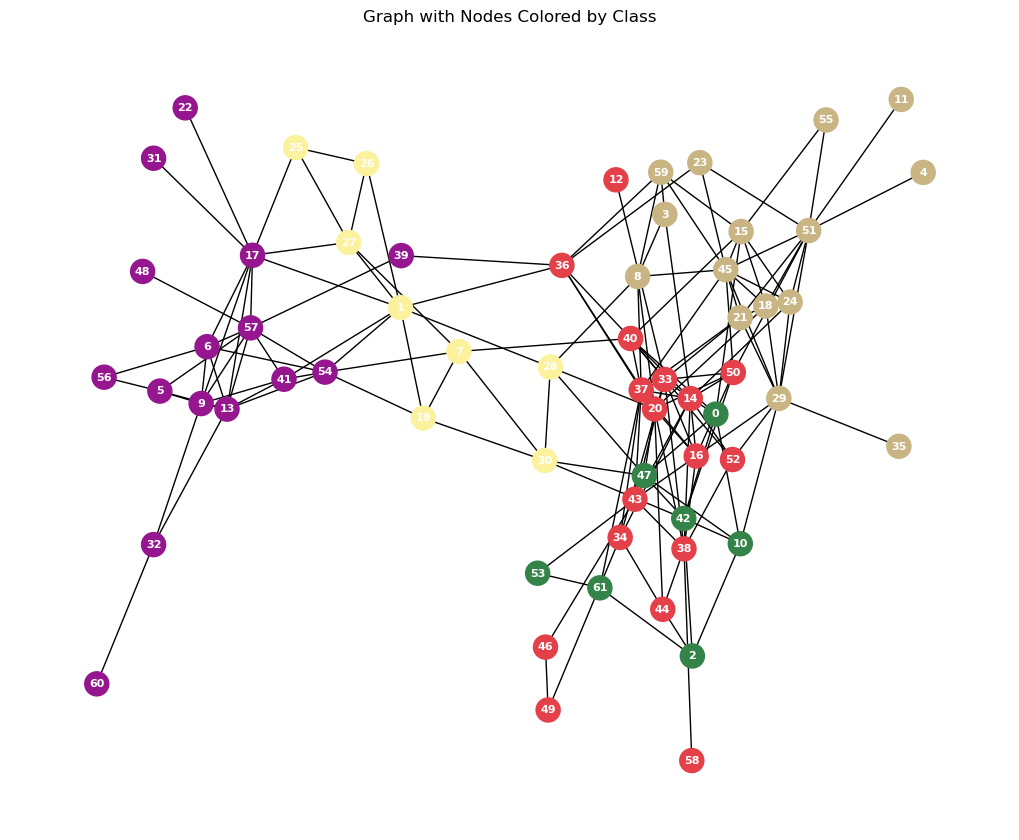

In [23]:
# draw the resulting graph 
g4.draw()

In [24]:
# print the number of communities detected by VNDS
print(f"Nombre de communités detectées par l'heuristique VNDS  est : {len(g4.used_labels)}")

Nombre de communités detectées par l'heuristique VNDS  est : 5


In [25]:
# Comparaison with ground truth
groundTruth4 = np.array([0,1,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0])
print(len(groundTruth4))
assert len(groundTruth4) == len(g4.V)

PredictedLabels4 = []
for node in g4.V:
  PredictedLabels4.append(g4.G.nodes[node]['color'])

pd.crosstab(PredictedLabels4, groundTruth4)

62


col_0     0   1
row_0          
#348348   7   0
#95168f   1  14
#c9b584  15   0
#e4404a  17   0
#fcf19d   2   6

In [26]:
# Calculating the NMI
nmi_score4 = NMI(groundTruth4,PredictedLabels4)

print("Normalized Mutual Information:", nmi_score4)

Normalized Mutual Information: 0.45579620909863294


# Dataset synthetique 0.10

In [27]:
from utils import load_synth_graph

In [28]:
file_path_010 = "./LFR/0.10/"
G5, groundTruth5 = load_synth_graph(file_path_010)

In [29]:
number_of_nodes5 = G5.number_of_nodes()

adj_matrix5 = np.zeros((number_of_nodes5, number_of_nodes5))

for e1, e2 in G5.edges():
  adj_matrix5[e1, e2] = 1
  adj_matrix5[e2, e1] = 1

assert np.all(adj_matrix5 == adj_matrix5.T)

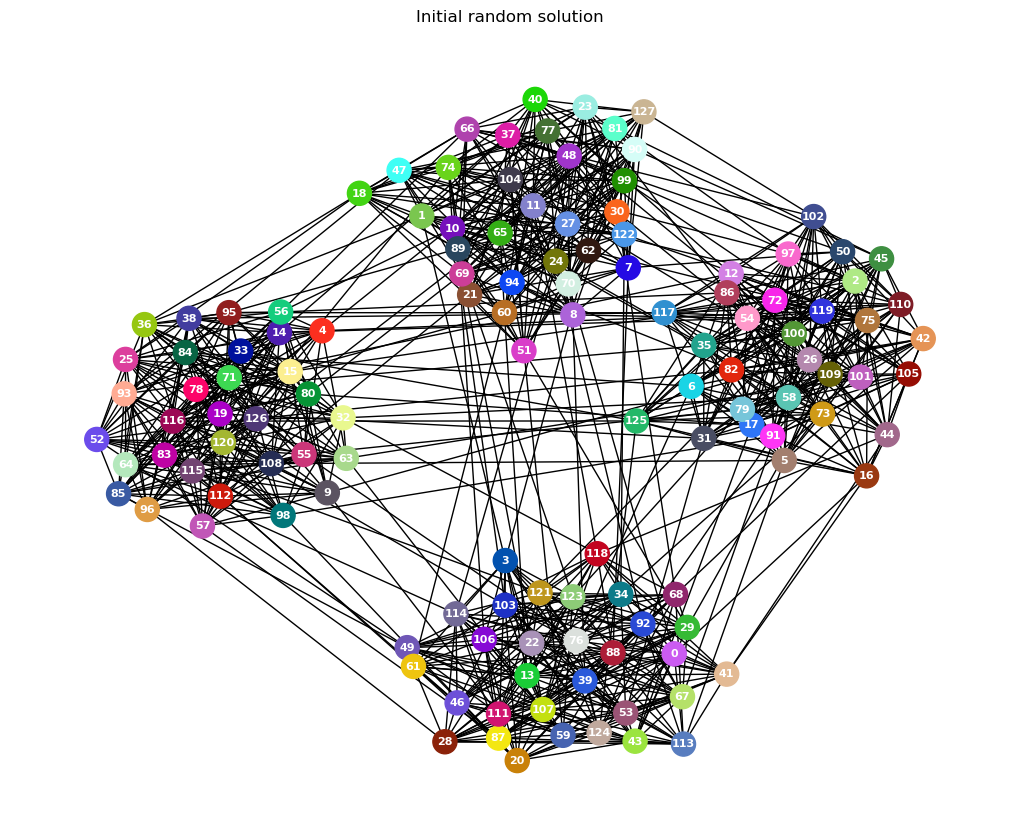

starting Execution
Execution finished 


In [30]:
assert np.all(adj_matrix5 == adj_matrix5.T)

NUMBER_VERTICES_5 = adj_matrix5.shape[0]
adj_matrix5 = pd.DataFrame(adj_matrix5, index = range(NUMBER_VERTICES_5), columns = range(NUMBER_VERTICES_5))

vnds5 = VNDS()
g5 = vnds5.VNDS_main(adj_matrix5, stoping_condition=5)

In [31]:
# print the modularity of the resulting graph 
print("Modularity of the graph :", g5.Q())

Modularity of the graph : 0.6484375


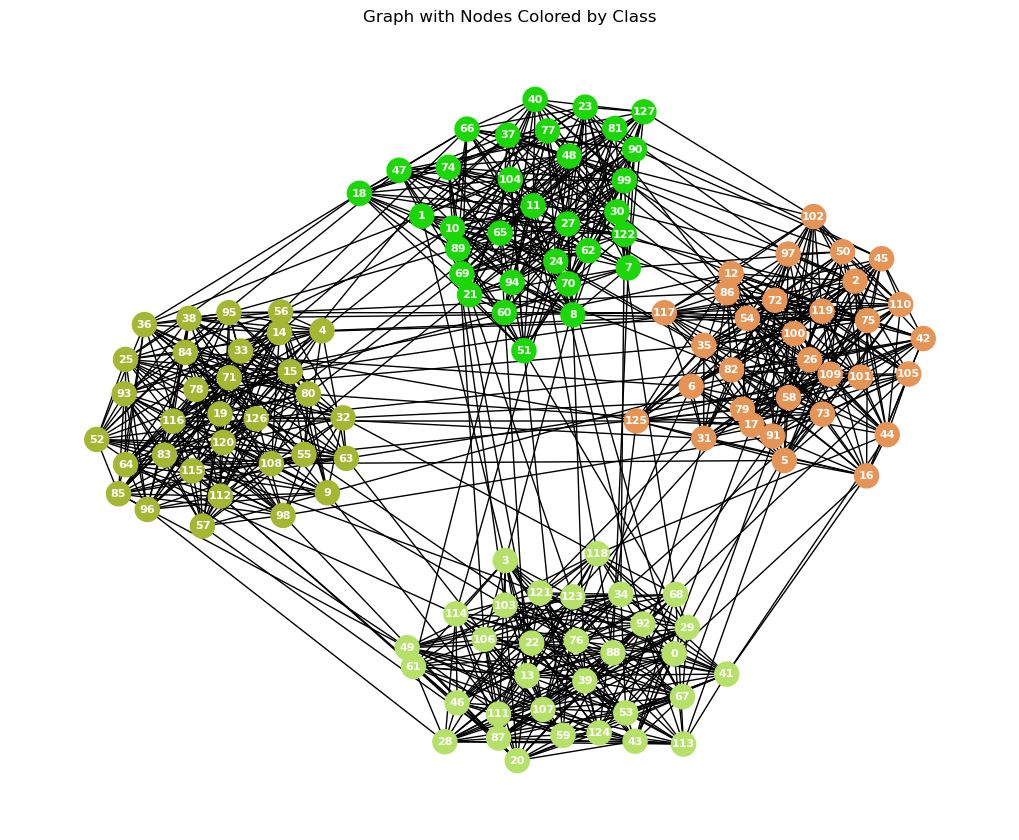

In [32]:
# draw the resulting graph
g5.draw()

In [33]:
# print the number of communities detected by VNDS
print(f"Nombre de communités detectées par l'heuristique VNDS  est : {len(g5.used_labels)}")

Nombre de communités detectées par l'heuristique VNDS  est : 4


In [34]:
# DATASET LFR 0.10
assert len(groundTruth5) == len(g5.V)

PredictedLabels5 = []
for node in np.sort(g5.V):
  PredictedLabels5.append(g5.G.nodes[node]['color'])

pd.crosstab(PredictedLabels5, groundTruth5)

col_0     1   2   3   4
row_0                  
#1cd708   0   0  32   0
#a4b732  32   0   0   0
#b5e169   0  32   0   0
#e59456   0   0   0  32

In [35]:
# Calculating the NMI
nmi_score5 = NMI(groundTruth5,PredictedLabels5)

print("Normalized Mutual Information:", nmi_score5)

Normalized Mutual Information: 1.0


# Dataset Synthethique 0.4

In [36]:
file_path_040 = "./LFR/0.40/"
G6, groundTruth6 = load_synth_graph(file_path_040)

In [37]:
number_of_nodes_6 = G6.number_of_nodes()

adj_matrix6 = np.zeros((number_of_nodes_6, number_of_nodes_6))

for e1, e2 in G6.edges():
  adj_matrix6[e1, e2] = 1
  adj_matrix6[e2, e1] = 1

assert np.all(adj_matrix6 == adj_matrix6.T)

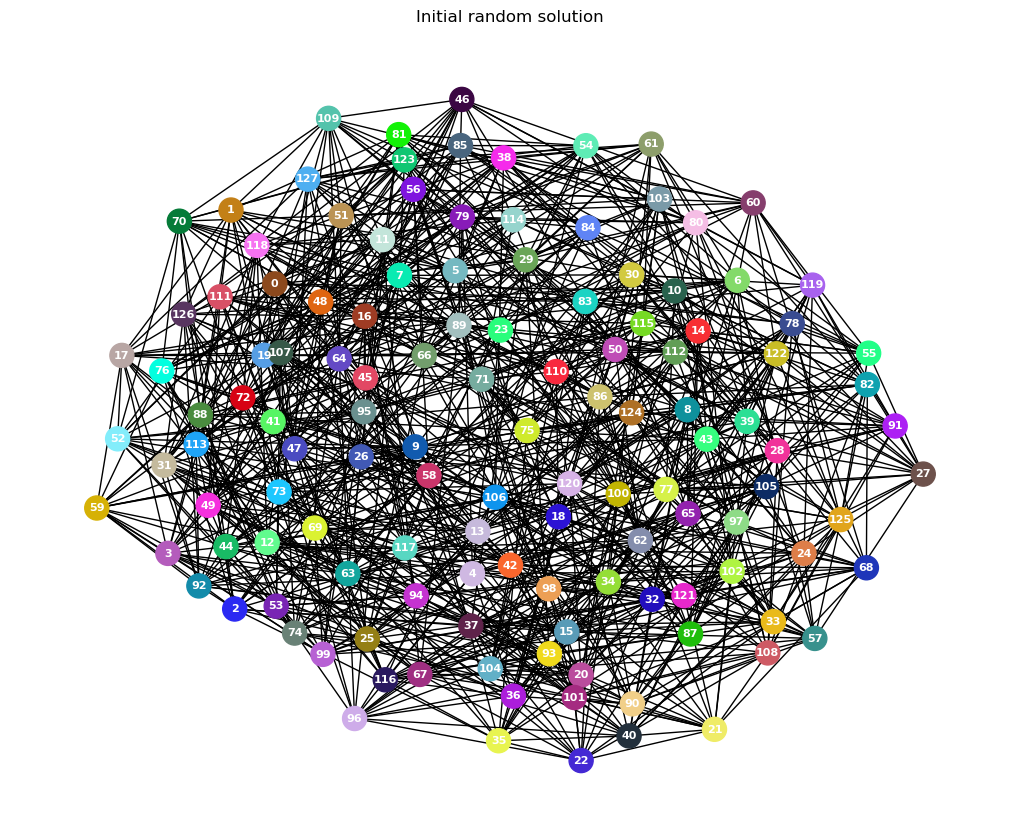

starting Execution
Execution finished 


In [38]:
NUMBER_VERTICES_6 = adj_matrix6.shape[0]
adj_matrix6 = pd.DataFrame(adj_matrix6, index = range(NUMBER_VERTICES_6), columns = range(NUMBER_VERTICES_6))

vnds6 = VNDS()
g6 = vnds6.VNDS_main(adj_matrix6, stoping_condition=1)

In [39]:
# print the modularity of the resulting graph 
print("Modularity of the graph :", g6.Q())

Modularity of the graph : 0.34765625


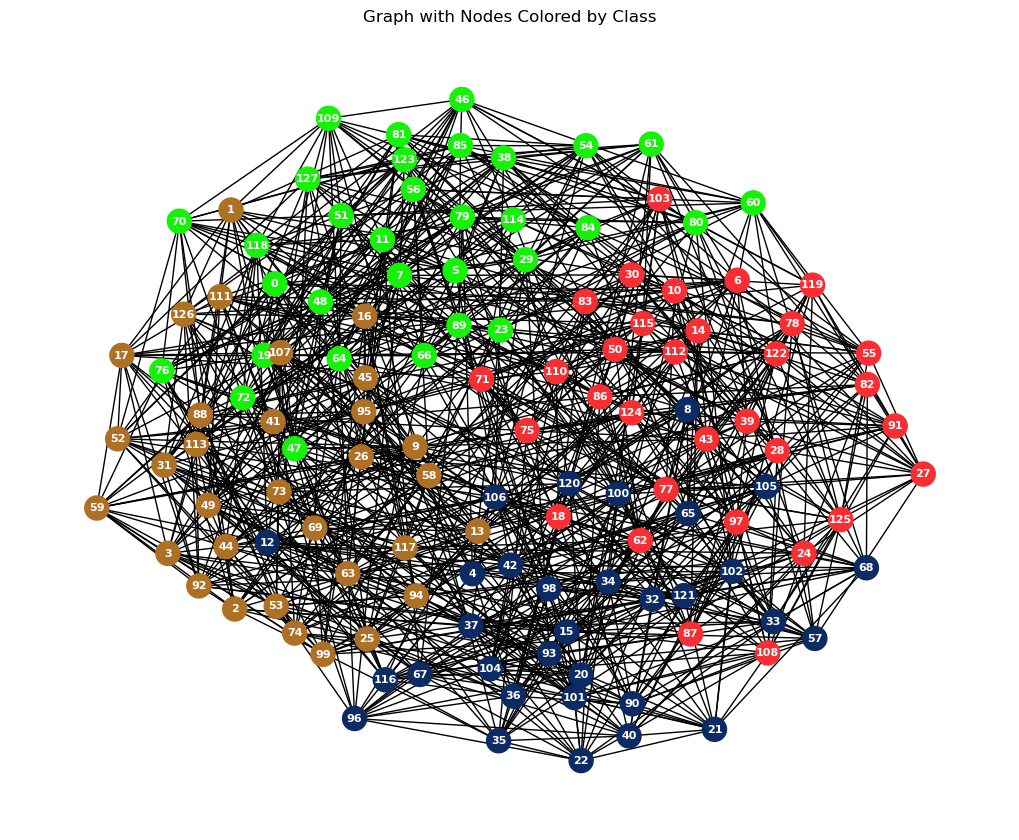

In [40]:
# draw the resulting graph
g6.draw()

In [41]:
# print the number of communities detected by VNDS
print(f"Nombre de communités detectées par l'heuristique VNDS  est : {len(g6.used_labels)}")

Nombre de communités detectées par l'heuristique VNDS  est : 4


In [42]:
assert len(groundTruth6) == len(g6.V)

PredictedLabels6 = []
for node in g6.V:
  PredictedLabels6.append(g6.G.nodes[node]['color'])

pd.crosstab(PredictedLabels6, groundTruth6)

col_0     1   2   3   4
row_0                  
#0c2b64   0   0  32   0
#13f207   0   0   0  32
#ae7025  32   0   0   0
#f82e33   0  32   0   0

In [43]:
# Assuming labels_true and labels_pred are the true and predicted labels
nmi_score6 = NMI(groundTruth6,PredictedLabels6)

print("Normalized Mutual Information:", nmi_score6)

Normalized Mutual Information: 1.0
